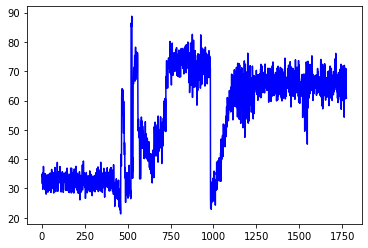

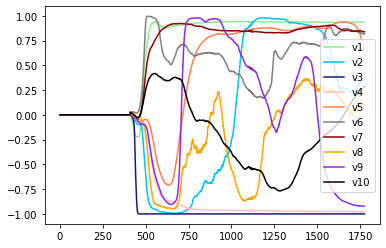

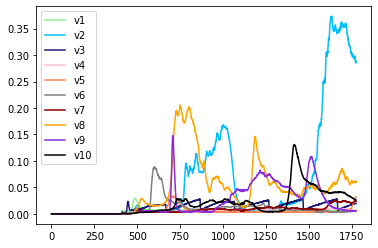

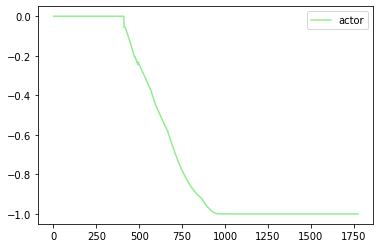

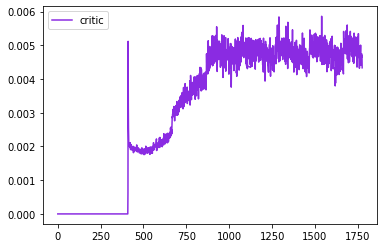

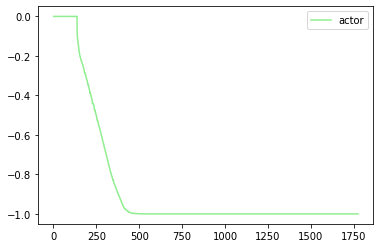

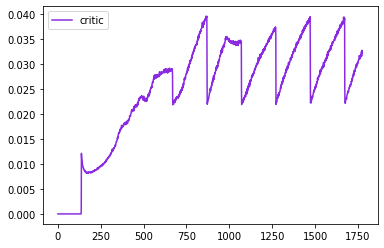

In [8]:
from File_Name import project_dir, data
from Utilities.FileOperator import load_obj, load_name
import pandas as pd
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', None)
#
# def print_env():
#
def draw_results(given_list_file_name):
    correct_list_file_name = project_dir + data + given_list_file_name
    list_file = load_obj(name=correct_list_file_name)
    csv_file_name = load_name(list_file, 'temple_result_name')
    df = pd.read_csv(csv_file_name, names=["Epoch index", "Total reward", "Time taken"], header=0)
    epoch_index = df["Epoch index"].values.tolist()
    rewards = df["Total reward"].values.tolist()
    plt.plot(epoch_index, rewards, '-', color='b')  # s-:方形
    # plt.plot(x, k2, 'o-', color='g', label="CNN-RLSTM")  # o-:圆形
    # plt.xlabel("region length")  # 横坐标名字
    # plt.ylabel("accuracy")  # 纵坐标名字
    # plt.legend(loc="best")  # 图例
    # plt.savefig('results.png')
    plt.show()


def read_loss(given_list_file_name):
    correct_list_file_name = project_dir + data + given_list_file_name
    list_file = load_obj(name=correct_list_file_name)
    csv_file_name = load_name(list_file, 'temple_loss_name')
    df = pd.read_csv(csv_file_name, names=["Epoch index",
                                           "Actor of V1", "Actor of V2", "Actor of V3",
                                           "Actor of V4", "Actor of V5", "Actor of V6",
                                           "Actor of V7", "Actor of V8", "Actor of V9",
                                           "Actor of V10",
                                           "Critic of V1", "Critic of V2", "Critic of V3",
                                           "Critic of V4", "Critic of V5", "Critic of V6",
                                           "Critic of V7", "Critic of V8", "Critic of V9",
                                           "Critic of V10",
                                           "Actor of Edge", "Critic of Edge",
                                           "Actor of Reward", "Critic of Reward"], header=0)
    df = df[df["Epoch index"] >= 1]
    # df = df[df["Epoch index"] <= 310]
    return df


def draw_actor_loss_of_sensor_nodes(given_list_file_name):
    df = read_loss(given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    actor_loss_of_v1 = df["Actor of V1"].values.tolist()
    actor_loss_of_v2 = df["Actor of V2"].values.tolist()
    actor_loss_of_v3 = df["Actor of V3"].values.tolist()
    actor_loss_of_v4 = df["Actor of V4"].values.tolist()
    actor_loss_of_v5 = df["Actor of V5"].values.tolist()
    actor_loss_of_v6 = df["Actor of V6"].values.tolist()
    actor_loss_of_v7 = df["Actor of V7"].values.tolist()
    actor_loss_of_v8 = df["Actor of V8"].values.tolist()
    actor_loss_of_v9 = df["Actor of V9"].values.tolist()
    actor_loss_of_v10 = df["Actor of V10"].values.tolist()
    plt.plot(epoch_index, actor_loss_of_v1, '-', color='lightgreen', label='v1')
    plt.plot(epoch_index, actor_loss_of_v2, '-', color='deepskyblue', label='v2')
    plt.plot(epoch_index, actor_loss_of_v3, '-', color='midnightblue', label='v3')
    plt.plot(epoch_index, actor_loss_of_v4, '-', color='pink', label='v4')
    plt.plot(epoch_index, actor_loss_of_v5, '-', color='coral', label='v5')
    plt.plot(epoch_index, actor_loss_of_v6, '-', color='gray', label='v6')
    plt.plot(epoch_index, actor_loss_of_v7, '-', color='darkred', label='v7')
    plt.plot(epoch_index, actor_loss_of_v8, '-', color='orange', label='v8')
    plt.plot(epoch_index, actor_loss_of_v9, '-', color='blueviolet', label='v9')
    plt.plot(epoch_index, actor_loss_of_v10, '-', color='black', label='v10')
    plt.legend(loc="best")  # 图例
    plt.show()


def draw_critic_loss_of_sensor_nodes(given_list_file_name):
    df = read_loss(given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    critic_loss_of_v1 = df["Critic of V1"].values.tolist()
    critic_loss_of_v2 = df["Critic of V2"].values.tolist()
    critic_loss_of_v3 = df["Critic of V3"].values.tolist()
    critic_loss_of_v4 = df["Critic of V4"].values.tolist()
    critic_loss_of_v5 = df["Critic of V5"].values.tolist()
    critic_loss_of_v6 = df["Critic of V6"].values.tolist()
    critic_loss_of_v7 = df["Critic of V7"].values.tolist()
    critic_loss_of_v8 = df["Critic of V8"].values.tolist()
    critic_loss_of_v9 = df["Critic of V9"].values.tolist()
    critic_loss_of_v10 = df["Critic of V10"].values.tolist()
    plt.plot(epoch_index, critic_loss_of_v1, '-', color='lightgreen', label='v1')
    plt.plot(epoch_index, critic_loss_of_v2, '-', color='deepskyblue', label='v2')
    plt.plot(epoch_index, critic_loss_of_v3, '-', color='midnightblue', label='v3')
    plt.plot(epoch_index, critic_loss_of_v4, '-', color='pink', label='v4')
    plt.plot(epoch_index, critic_loss_of_v5, '-', color='coral', label='v5')
    plt.plot(epoch_index, critic_loss_of_v6, '-', color='gray', label='v6')
    plt.plot(epoch_index, critic_loss_of_v7, '-', color='darkred', label='v7')
    plt.plot(epoch_index, critic_loss_of_v8, '-', color='orange', label='v8')
    plt.plot(epoch_index, critic_loss_of_v9, '-', color='blueviolet', label='v9')
    plt.plot(epoch_index, critic_loss_of_v10, '-', color='black', label='v10')
    plt.legend(loc="best")  # 图例
    plt.show()


def draw_actor_loss_of_edge(given_list_file_name):
    df = read_loss(given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    actor_loss_of_edge = df["Actor of Edge"].values.tolist()
    plt.plot(epoch_index, actor_loss_of_edge, '-', color='lightgreen', label='actor')
    plt.legend(loc="best")  # 图例
    plt.show()


def draw_critic_loss_of_edge(given_list_file_name):
    df = read_loss(given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    critic_loss_of_edge = df["Critic of Edge"].values.tolist()
    plt.plot(epoch_index, critic_loss_of_edge, '-', color='blueviolet', label='critic')
    plt.legend(loc="best")  # 图例
    plt.show()


def draw_actor_loss_of_reward(given_list_file_name):
    df = read_loss(given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    actor_loss_of_reward = df["Actor of Reward"].values.tolist()
    plt.plot(epoch_index, actor_loss_of_reward, '-', color='lightgreen', label='actor')
    plt.legend(loc="best")  # 图例
    plt.show()


def draw_critic_loss_of_reward(given_list_file_name):
    df = read_loss(given_list_file_name)
    epoch_index = df["Epoch index"].values.tolist()
    critic_loss_of_reward = df["Critic of Reward"].values.tolist()
    plt.plot(epoch_index, critic_loss_of_reward, '-', color='blueviolet', label='critic')
    plt.legend(loc="best")  # 图例
    plt.show()


if __name__ == '__main__':
    file_name = '2021-09-14-04-49-44-list_file_name.pkl'

    draw_results(file_name)
    draw_actor_loss_of_sensor_nodes(given_list_file_name=file_name)
    draw_critic_loss_of_sensor_nodes(given_list_file_name=file_name)
    draw_actor_loss_of_edge(given_list_file_name=file_name)
    draw_critic_loss_of_edge(given_list_file_name=file_name)
    draw_actor_loss_of_reward(given_list_file_name=file_name)
    draw_critic_loss_of_reward(given_list_file_name=file_name)
